# 16.4 Case Study: Time Series and Simple Linear Regression 
### Loading the Average High Temperatures into a `DataFrame` 

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [17]:
import matplotlib
import pandas as pd

In [18]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [20]:
nyc.Date = nyc.Date.floordiv(100)

In [53]:
nyc.head(15)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


### Splitting the Data for Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [24]:
X_train.shape

(93, 1)

In [25]:
X_test.shape

(31, 1)

### Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [29]:
linear_regression.coef_

array([0.01939167])

In [30]:
linear_regression.intercept_

-0.30779820252658396

### Testing the Model

In [31]:
predicted = linear_regression.predict(X_test)

In [32]:
expected = y_test

In [33]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures 

In [34]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [35]:
predict(2019)

array([38.84399018])

In [36]:
predict(1890)

array([36.34246432])

### Visualizing the Dataset with the Regression Line

In [37]:
import seaborn as sns

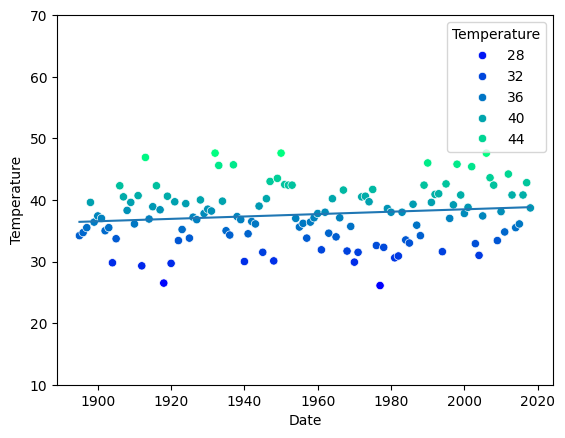

In [55]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=True)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

In [39]:
# This placeholder cell was added because we had to combine 
# the sections snippets 22-28 for the visualization to work in Jupyter
# and want the subsequent snippet numbers to match the book

In [40]:
# Placeholder cell 

In [41]:
# Placeholder cell 

In [42]:
# Placeholder cell 

In [43]:
# Placeholder cell 

In [44]:
# Placeholder cell 

![Self Check Exercises check mark image](files/art/check.png)
## 16.4 Self Check
**1. _(Fill-In)_** A `LinearRegression` object’s `________` and `________` attributes can be used as _m_ and _b_, respectively, in the equation _y = mx + b_ to make predictions. 

**Answer:** `coeff_`, `intercept_`.

**2. _(True/False)_** By default, the `LinearRegression` estimator performs simple linear regression.

**Answer:** False. By default, the `LinearRegression` estimator uses all the numeric features in a dataset, performing a multiple linear regression.

**3. _(IPython Session)_** Use the predict lambda to estimate what the average January high temperature was in `1889` and to predict what it will be in `2020`.

**Answer:** 

In [45]:
predict(1889)

array([36.32307265])

In [60]:
predict(2100)

array([40.41471572])

In [47]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
